In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Loading data

In [2]:
df = pd.read_csv('03_tennisai_data.csv')

# Check for NaNs

In [3]:
# Check for NaN values in dataset
print("There is%s NaNs in dataset" %(" not" if not df.isnull().values.any() else ""))

There is not NaNs in dataset


# Match result

In [4]:
# Evaluate final result for every set
p1_set_list = [df['p1_set'+str(i)].iloc[-1] for i in range(1,6) if df['p1_set'+str(i)].iloc[-1] != -1]
p2_set_list = [df['p2_set'+str(i)].iloc[-1] for i in range(1,6) if df['p2_set'+str(i)].iloc[-1] != -1]

# Evaluate set score for final set
if(df['p1_sets'].iloc[-1] == df['p2_sets'].iloc[-1]):
    if(df['matchpoint'].iloc[-1]==1):
        p1_set_list.append(df['p1_games'].iloc[-1]+1)
        p2_set_list.append(df['p2_games'].iloc[-1])
    elif(df['matchpoint'].iloc[-1]==2):
        p1_set_list.append(df['p1_games'].iloc[-1])
        p2_set_list.append(df['p2_games'].iloc[-1]+1)
    else:
        raise ValueError("There is no winner!")
        
# Match winner
player1_name = df['p1'].iloc[0][0].upper() + df['p1'].iloc[0][1::]
player2_name = df['p2'].iloc[0][0].upper() + df['p2'].iloc[0][1::]
player_name = [player1_name, player2_name]
match_winner = player1_name if(p1_set_list > p2_set_list) else player2_name

# Dictionary for match result data
match_result = {}

# Adding sets in dictionary
for num_set in range(len(p1_set_list)):
    match_result['Set ' + str(num_set+1)] = [p1_set_list[num_set], p2_set_list[num_set]]
    
# Adding winner in dictionary
if(match_winner == player1_name):
    match_result['Winner'] = [True, False]
else:
    match_result['Winner'] = [False, True]
    
match_result_df = pd.DataFrame(data=match_result)
match_result_df.index = [player1_name, player2_name]
match_result_df.head()

,Set 1,Set 2,Set 3,Set 4,Set 5,Winner
Djokovic,7,1,7,4,13,True
Federer,6,6,6,6,12,False


# Serve analysis

## Overall serve analysis

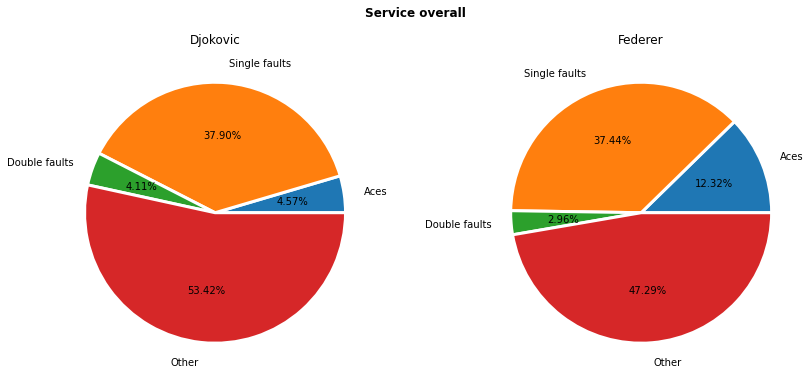

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Service overall', fontweight='bold')

for i,p in zip(range(2),range(1,3)):
    # Points by serve
    serve_df = df.loc[(df['server']==player_name[i].lower())]
    
    # Number of services
    N_serve = serve_df.shape[0]
    
    # Aces
    N_aces = serve_df.loc[serve_df['ace'] == p].shape[0]
    
    # Double faults
    N_double_f = serve_df.loc[serve_df['double_fault'] == p].shape[0]
    # Single faults
    N_single_f = serve_df.loc[serve_df['2nd_serve'] == p].shape[0]
    
    values = [
        N_aces,
        N_single_f,
        N_double_f, 
        serve_df.shape[0] - (N_aces+N_single_f+N_double_f)
    ]
    names = [
        'Aces',
        'Single faults',
        'Double faults',
        'Other'
    ]
    
    ax[i].pie(values,
              labels=names,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[i].set_title(player_name[i])

plt.show()

## Service by sets

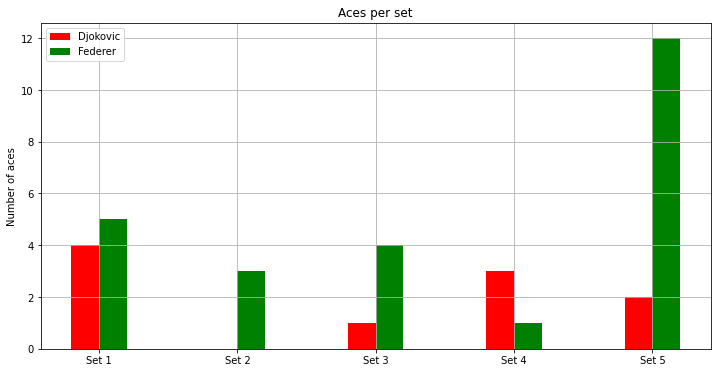

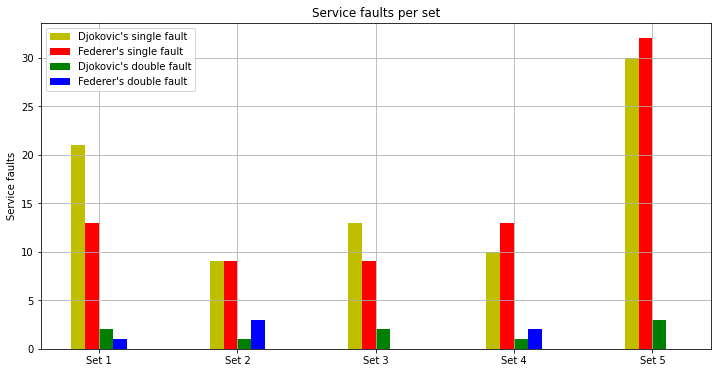

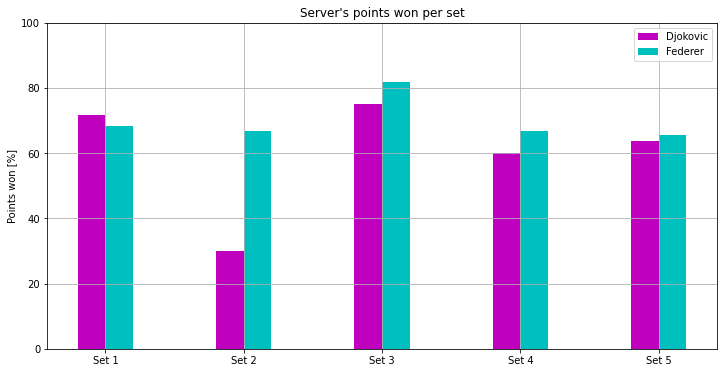

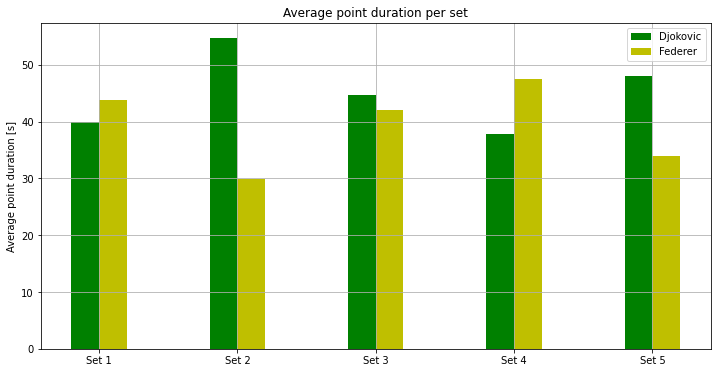

In [6]:
# Number of sets
N_sets = len(p1_set_list)

# List for important data
aces_set = []
first_fault_set = []
second_fault_set = []
points_won_ratio = []
point_duration = []

for i,p in zip(range(2),range(1,3)):
    # Points by serve
    serve_df = df.loc[(df['server']==player_name[i].lower())]
    
    
    aces_set_ = []
    first_fault_set_ = []
    second_fault_set_ = []
    points_won_ratio_ = []
    point_duration_ = []
    
    for s in range(1, N_sets+1):
        # Current set
        if(s == 1):
            set_df = serve_df.loc[serve_df['p'+str(p)+'_set'+str(s)] == -1]
        else:
            set_df = serve_df.loc[(serve_df['p'+str(p)+'_set'+str(s)] == -1) &
                                  (serve_df['p'+str(p)+'_set'+str(s-1)] != -1)]
        
        # Aces in current set
        N_ace = set_df.loc[set_df['ace'] == p].shape[0]
        
        # Double faults
        N_double_fault = set_df.loc[set_df['double_fault'] == p].shape[0]
        # Single faults
        N_single_fault = set_df.loc[set_df['2nd_serve'] == p].shape[0]
        
        # Points won and lost in first serve
        N_won_ratio = 100*set_df.loc[(set_df['pt_won_by'] == p)].shape[0]/set_df.shape[0]
        
        # Append values to list
        aces_set_.append(N_ace)
        first_fault_set_.append(N_single_fault)
        second_fault_set_.append(N_double_fault)
        points_won_ratio_.append(N_won_ratio)
        
        # Average point duration
        point_duration_.append(np.mean(set_df['point_duration']))
        
    aces_set.append(aces_set_)
    first_fault_set.append(first_fault_set_)
    second_fault_set.append(second_fault_set_)
    points_won_ratio.append(points_won_ratio_)
    point_duration.append(point_duration_)
    
    
# x axis
sets = np.arange(1, N_sets+1)
set_names = tuple(['Set '+str(s) for s in sets])

# Aces per sets
plt.figure(figsize=(12,6))
plt.bar(sets-0.1, aces_set[0], width=0.2, color='r', align='center')
plt.bar(sets+0.1, aces_set[1], width=0.2, color='g', align='center')
plt.ylabel('Number of aces')
plt.xticks(sets, set_names)
plt.title('Aces per set')
plt.legend(player_name)
plt.grid('minor')
plt.show()
    
# Faults per sets
plt.figure(figsize=(12,6))
plt.bar(sets-0.15, first_fault_set[0], width=0.1, color='y', align='center')
plt.bar(sets-0.05, first_fault_set[1], width=0.1, color='r', align='center')
plt.bar(sets+0.05, second_fault_set[0], width=0.1, color='g', align='center')
plt.bar(sets+0.15, second_fault_set[1], width=0.1, color='b', align='center')
plt.xticks(sets, set_names)
plt.ylabel('Service faults')
plt.title('Service faults per set')
plt.legend([player_name[0]+'\'s single fault', player_name[1]+'\'s single fault',
            player_name[0]+'\'s double fault', player_name[1]+'\'s double fault'])
plt.grid('minor')
plt.show()


# Percentage of points won per set
plt.figure(figsize=(12,6))
plt.bar(sets-0.1, points_won_ratio[0], width=0.2, color='m', align='center')
plt.bar(sets+0.1, points_won_ratio[1], width=0.2, color='c', align='center')
plt.ylabel('Points won [%]')
plt.xticks(sets, set_names)
plt.ylim([0, 100])
plt.title('Server\'s points won per set')
plt.legend(player_name)
plt.grid('minor')
plt.show()

# Average point duration per set
plt.figure(figsize=(12,6))
plt.bar(sets-0.1, point_duration[0], width=0.2, color='g', align='center')
plt.bar(sets+0.1, point_duration[1], width=0.2, color='y', align='center')
plt.ylabel('Average point duration [s]')
plt.xticks(sets, set_names)
plt.title('Average point duration per set')
plt.legend(player_name)
plt.grid('minor')
plt.show()

## First and second service

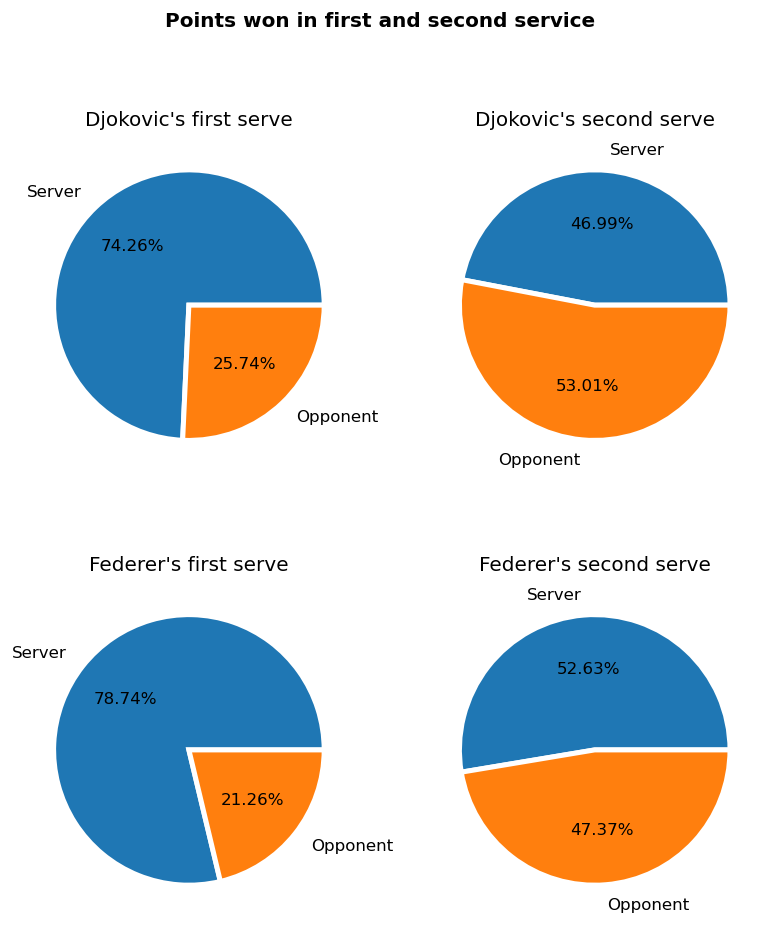

In [7]:
fs_pts = []
ss_pts = []

for i,p in zip(range(2),range(1,3)):
    # Points by serve
    serve_df = df.loc[df['server']==player_name[i].lower()]
    
    # First service data
    fs_df = serve_df.loc[serve_df['2nd_serve']==0]
    
    # Second service data
    ss_df = serve_df.loc[serve_df['2nd_serve']==p]
    
    # First service won
    Nfs_won = fs_df.loc[fs_df['pt_won_by'] == p].shape[0]
    # First service lost
    Nfs_lost = fs_df.shape[0] - Nfs_won
    fs_pts.append([Nfs_won, Nfs_lost])
    
    # Second service won
    Nss_won = ss_df.loc[ss_df['pt_won_by'] == p].shape[0]
    # Second service lost
    Nss_lost = ss_df.shape[0] - Nss_won
    ss_pts.append([Nss_won, Nss_lost])
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,9), dpi=120, facecolor='white')
ax = axes.ravel()
plt.suptitle('Points won in first and second service', fontweight='bold')

for i in range(2):
    ax[i*2].pie([fs_pts[i][0], fs_pts[i][1]],
              labels=['Server', 'Opponent'],
                labeldistance=1.15,
                wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                autopct = '%.2f%%')
    ax[i*2].set_title(player_name[i]+'\'s first serve')
    
    ax[i*2+1].pie([ss_pts[i][0], ss_pts[i][1]],
                labels=['Server', 'Opponent'],
                labeldistance=1.15,
                wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                autopct = '%.2f%%')
    ax[i*2+1].set_title(player_name[i]+'\'s second serve')

plt.show()

## Players service type and direction analysis

In [8]:
# Player 1
serve_df = df.loc[df['server']==player_name[0].lower()]

fs_df1 = pd.DataFrame(0,
                    columns=['ace', 'service winner', 'fault (long)', 'fault (wide)', 'fault (net)', 'fault (wide and long)', 'regular'],
                    index = ['wide', 'down the T', 'to body'],
                    dtype = int)
fs_df1.index = ['wide', 'down the T', 'to body']

ss_df1 = pd.DataFrame(0,
                    columns=['ace', 'service winner', 'fault (long)', 'fault (wide)', 'fault (net)', 'fault (wide and long)', 'regular'],
                    index = ['wide', 'down the T', 'to body'],
                    dtype = int)
ss_df1.index = ['wide', 'down the T', 'to body']


for i in range(serve_df.shape[0]):
    # Extract info about service
    serve_desc = serve_df['point_description'].iloc[i].split(';')[0].split('.')
    
    # Categorize first serve
    for desc in serve_desc:
        if('1st' in desc):
            # Remove string '1st serve'
            desc_list = desc[10::].split(',')

            if(len(desc_list) == 1):
                fs_df1.loc[desc_list[0], 'regular'] += 1
            else:
                fs_df1.loc[desc_list[0], desc_list[1][1::]] += 1
                
        elif('2nd' in desc):
            # Remove string ' 2nd serve'
            desc_list = desc[11::].split(',')
           
            
            if(len(desc_list) == 1):
                ss_df1.loc[desc_list[0], 'regular'] += 1
            else:
                ss_df1.loc[desc_list[0], desc_list[1][1::]] += 1      
                
# Player 2
serve_df = df.loc[df['server']==player_name[1].lower()]

fs_df2 = pd.DataFrame(0,
                    columns=['ace', 'service winner', 'fault (long)', 'fault (wide)', 'fault (net)', 'fault (wide and long)', 'regular'],
                    index = ['wide', 'down the T', 'to body'],
                    dtype = int)
fs_df2.index = ['wide', 'down the T', 'to body']

ss_df2 = pd.DataFrame(0,
                    columns=['ace', 'service winner', 'fault (long)', 'fault (wide)', 'fault (net)', 'fault (wide and long)', 'regular'],
                    index = ['wide', 'down the T', 'to body'],
                    dtype = int)
ss_df2.index = ['wide', 'down the T', 'to body']


for i in range(serve_df.shape[0]):
    # Extract info about service
    serve_desc = serve_df['point_description'].iloc[i].split(';')[0].split('.')
    
    # Categorize first serve
    for desc in serve_desc:
        if('1st' in desc):
            # Remove string '1st serve'
            desc_list = desc[10::].split(',')

            if(len(desc_list) == 1):
                fs_df2.loc[desc_list[0], 'regular'] += 1
            else:
                fs_df2.loc[desc_list[0], desc_list[1][1::]] += 1
                
        elif('2nd' in desc):
            # Remove string ' 2nd serve'
            desc_list = desc[11::].split(',')
           
            
            if(len(desc_list) == 1):
                ss_df2.loc[desc_list[0], 'regular'] += 1
            else:
                ss_df2.loc[desc_list[0], desc_list[1][1::]] += 1 

### First player's first service stats

In [9]:
fs_df1.head()

,ace,service winner,fault (long),fault (wide),fault (net),fault (wide and long),regular
wide,4,2,10,9,21,3,52
down the T,5,0,9,4,16,1,53
to body,0,0,6,0,4,0,20


### First player's second service stats

In [10]:
ss_df1.head()

,ace,service winner,fault (long),fault (wide),fault (net),fault (wide and long),regular
wide,0,0,1,1,1,0,22
down the T,1,0,0,0,1,0,19
to body,0,0,4,0,1,0,32


### Second player's first service stats

In [11]:
fs_df2.head()

,ace,service winner,fault (long),fault (wide),fault (net),fault (wide and long),regular
wide,10,1,4,18,18,4,59
down the T,15,0,11,9,11,0,40
to body,0,0,0,0,1,0,2


### Second player's second service stats

In [12]:
ss_df2.head()

,ace,service winner,fault (long),fault (wide),fault (net),fault (wide and long),regular
wide,0,0,0,0,1,0,32
down the T,0,0,4,0,0,0,17
to body,0,0,0,0,1,0,21


## Service direction

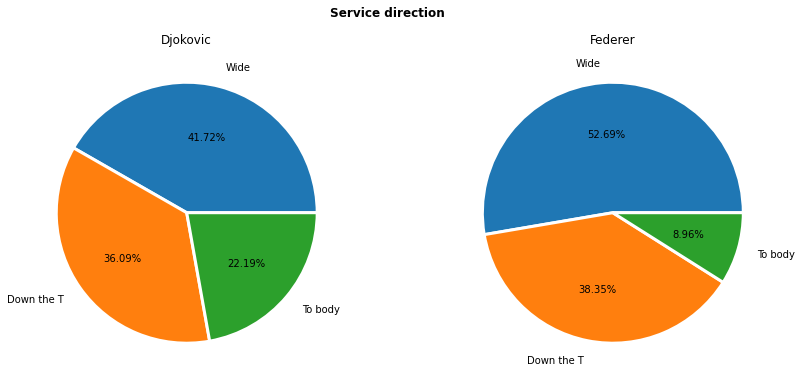

In [13]:
wide = [fs_df1.loc['wide'].to_numpy().sum() + ss_df1.loc['wide'].to_numpy().sum(),
        fs_df2.loc['wide'].to_numpy().sum() + ss_df2.loc['wide'].to_numpy().sum()]

down_the_T = [fs_df1.loc['down the T'].to_numpy().sum() + ss_df1.loc['down the T'].to_numpy().sum(),
              fs_df2.loc['down the T'].to_numpy().sum() + ss_df2.loc['down the T'].to_numpy().sum()]
to_body = [fs_df1.loc['to body'].to_numpy().sum() + ss_df1.loc['to body'].to_numpy().sum(),
           fs_df2.loc['to body'].to_numpy().sum() + ss_df2.loc['to body'].to_numpy().sum()]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Service direction', fontweight='bold')

for i in range(2):  
    values = [wide[i], down_the_T[i], to_body[i]]
    names = ['Wide','Down the T','To body']
    
    ax[i].pie(values,
              labels=names,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[i].set_title(player_name[i])
plt.show()

### First and second service direction

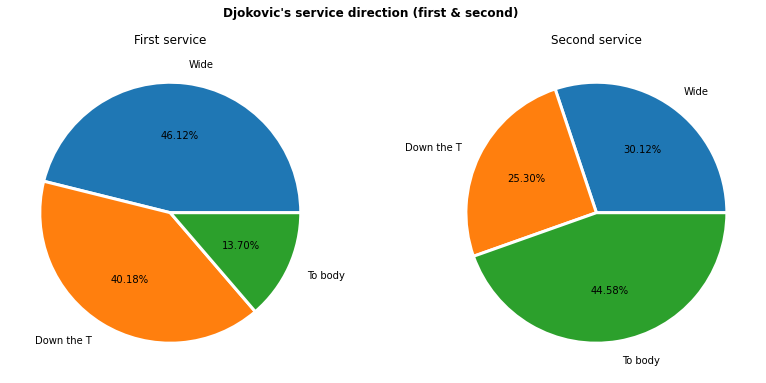

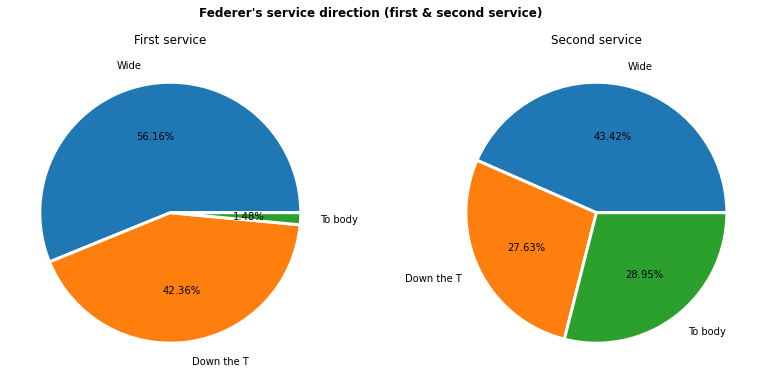

In [14]:
# Player 1
wide = [fs_df1.loc['wide'].to_numpy().sum(), ss_df1.loc['wide'].to_numpy().sum()]
down_the_T = [fs_df1.loc['down the T'].to_numpy().sum(), ss_df1.loc['down the T'].to_numpy().sum()]
to_body = [fs_df1.loc['to body'].to_numpy().sum(), ss_df1.loc['to body'].to_numpy().sum()]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle(player_name[0] + '\'s service direction (first & second)', fontweight='bold')
for i in range(2):  
    values = [wide[i], down_the_T[i], to_body[i]]
    names = ['Wide','Down the T','To body']
    ax[i].pie(values,
              labels=names,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    if(i==0):
        ax[i].set_title('First service')
    else:
        ax[i].set_title('Second service')
plt.show()


# Player 2
wide = [fs_df2.loc['wide'].to_numpy().sum(), ss_df2.loc['wide'].to_numpy().sum()]
down_the_T = [fs_df2.loc['down the T'].to_numpy().sum(), ss_df2.loc['down the T'].to_numpy().sum()]
to_body = [fs_df2.loc['to body'].to_numpy().sum(), ss_df2.loc['to body'].to_numpy().sum()]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle(player_name[1] + '\'s service direction (first & second service)', fontweight='bold')
for i in range(2):  
    values = [wide[i], down_the_T[i], to_body[i]]
    names = ['Wide','Down the T','To body']
    ax[i].pie(values,
              labels=names,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    if(i==0):
        ax[i].set_title('First service')
    else:
        ax[i].set_title('Second service')
plt.show()

### Aces direction

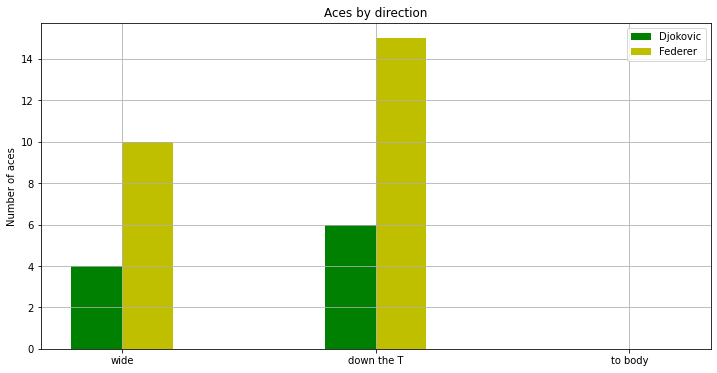

In [15]:
directions = ['wide','down the T','to body']
values1 = []
values2 = []
for direction in directions:
    # First player data
    values1.append(fs_df1.loc[direction, 'ace'] + ss_df1.loc[direction, 'ace'])
    values2.append(fs_df2.loc[direction, 'ace'] + ss_df2.loc[direction, 'ace'])
values = [values1, values2]
                    
positions = np.arange(3)

# Aces types
plt.figure(figsize=(12,6))
plt.bar(positions-0.1, values[0], width=0.2, color='g', align='center')
plt.bar(positions+0.1, values[1], width=0.2, color='y', align='center')
plt.ylabel('Number of aces')
plt.xticks(positions, directions)
plt.title('Aces by direction')
plt.legend(player_name)
plt.grid('minor')
plt.show()

### Fault direction

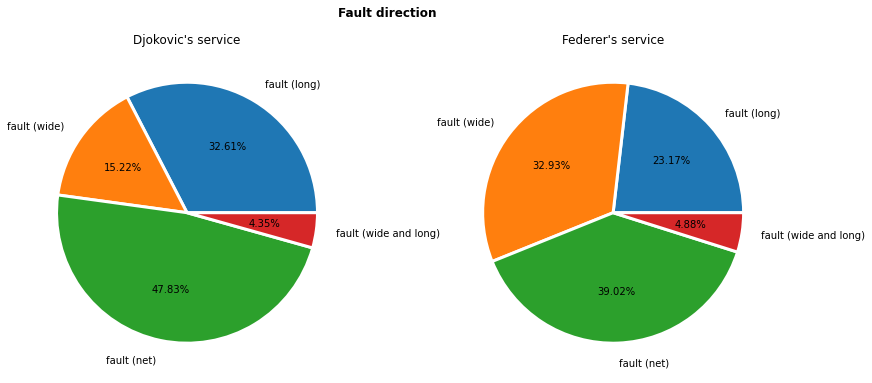

In [16]:
faults = ['fault (long)','fault (wide)','fault (net)','fault (wide and long)']
values1 = []
values2 = []
for fault in faults:
    values1.append(fs_df1[fault].to_numpy().sum() + ss_df1[fault].to_numpy().sum())
    values2.append(fs_df2[fault].to_numpy().sum() + ss_df2[fault].to_numpy().sum())
values = [values1, values2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Fault direction', fontweight='bold')
for i in range(2):  
    ax[i].pie(values[i],
              labels=faults,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[i].set_title(player_name[i]+'\'s service')
plt.show()
    

## Service outcome

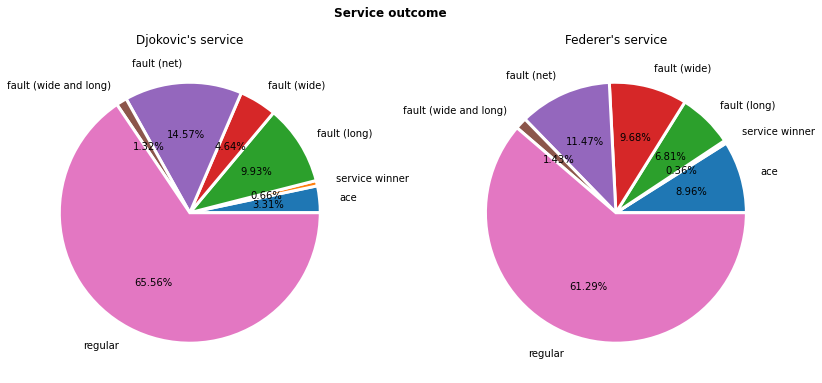

In [17]:
names = ['ace', 'service winner', 'fault (long)', 'fault (wide)', 'fault (net)', 'fault (wide and long)', 'regular']
values1 = []
values2 = []
for name in names:
    values1.append(fs_df1[name].to_numpy().sum() + ss_df1[name].to_numpy().sum())
    values2.append(fs_df2[name].to_numpy().sum() + ss_df2[name].to_numpy().sum())
values = [values1, values2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Service outcome', fontweight='bold')
for i in range(2):  
    ax[i].pie(values[i],
              labels=names,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[i].set_title(player_name[i]+'\'s service')
plt.show()

# Drop shot

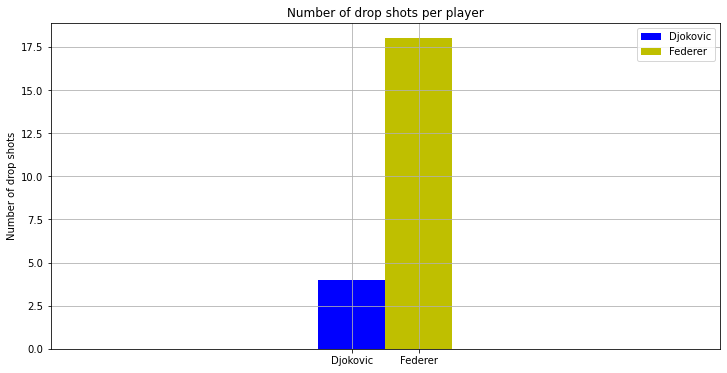

In [18]:
drop_shots = [df.loc[df["drop_shot"]==1].shape[0], df.loc[df["drop_shot"]==2].shape[0]]
position = 0

# Drop shots visualization
plt.figure(figsize=(12,6))
plt.bar(position-0.5, drop_shots[0], width=1, color='b', align='center')
plt.bar(position+0.5, drop_shots[1], width=1, color='y', align='center')
plt.ylabel('Number of drop shots')
plt.xticks([-0.5, 0.5], (player_name[0], player_name[1]))
plt.xlim([-5,5])
plt.title('Number of drop shots per player')
plt.legend(player_name)
plt.grid('minor')
plt.show()

# Lobs

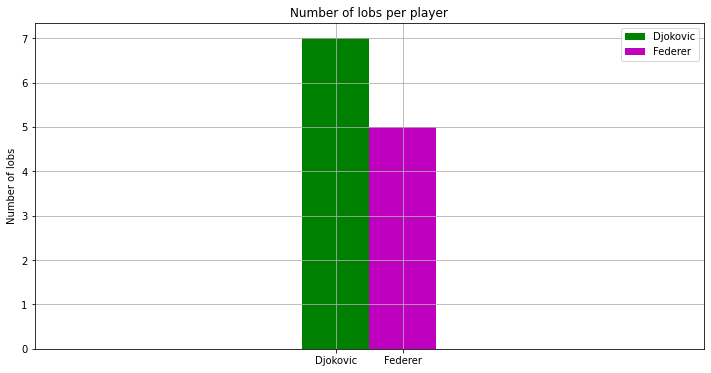

In [19]:
lobs = [df.loc[df["lob"]==1].shape[0], df.loc[df["lob"]==2].shape[0]]
position = 0

# Lobs visualization
plt.figure(figsize=(12,6))
plt.bar(position-0.5, lobs[0], width=1, color='g', align='center')
plt.bar(position+0.5, lobs[1], width=1, color='m', align='center')
plt.ylabel('Number of lobs')
plt.xticks([-0.5, 0.5], (player_name[0], player_name[1]))
plt.xlim([-5,5])
plt.title('Number of lobs per player')
plt.legend(player_name)
plt.grid('minor')
plt.show()

# Forehand/backhand analysis

In [36]:
player1_on_service = df.loc[df["server"] == player_name[1].lower()]

# Forehands
forehand = [{},{}]
# Backhands
backhand = [{},{}]

for player in range(2):
    
    # Extract data for current server
    player_on_service = df.loc[df["server"] == player_name[player].lower()]

    # If first player has service then later on at first stroke itr%2 = 0
    itr_init = 1 + player
    
    # Going through every point description
    for i in range(player_on_service.shape[0]):
        
        # Extract info about service
        point_desc = player_on_service['point_description'].iloc[i].split(';')

        # Iterator helps detecting current player
        itr = itr_init
        
        for desc in point_desc:
            itr += 1

            # Remove phrase 'return' if exists
            desc = desc.replace('return ','')

            # Check if forehand is played
            if('forehand' in desc):
                # Remove rally length
                stroke_desc = desc.split('.')[0]

                # Remove 'forehand ' from description
                stroke_desc = stroke_desc.replace(' forehand ','')

                # Check for winner/error
                if(len(stroke_desc.split(','))==2):
                    # Stroke type
                    stroke_type = stroke_desc.split(',')[0]
                    # Finish type
                    point_end = stroke_desc.split(',')[1]

                    # Check for winner
                    if('winner' in point_end):
                        # Check if key exists
                        if('winner' in forehand[itr%2].keys()):
                            forehand[itr%2]['winner'] += 1
                        else:
                            forehand[itr%2]['winner'] = 1  

                    # Check for error
                    elif('error' in point_end):
                        # Error description
                        error_type = point_end[1:]

                        # Check if key exists
                        if(error_type in forehand[itr%2].keys()):
                            forehand[itr%2][error_type] += 1
                        else:
                            forehand[itr%2][error_type] = 1
                    else:
                        raise ValueError("New type came up on the end of the point: %s" %(point_end))
                else:
                    if('rally' in forehand[itr%2].keys()):
                        forehand[itr%2]['rally'] += 1
                    else:
                        forehand[itr%2]['rally'] = 1
                        
            # Check if backhand is played
            if('backhand' in desc):
                # Remove rally length
                stroke_desc = desc.split('.')[0]

                # Remove 'forehand ' from description
                stroke_desc = stroke_desc.replace(' backhand ','')

                # Check for winner/error
                if(len(stroke_desc.split(','))==2):
                    # Stroke type
                    stroke_type = stroke_desc.split(',')[0]
                    # Finish type
                    point_end = stroke_desc.split(',')[1]

                    # Check for winner
                    if('winner' in point_end):
                        # Check if key exists
                        if('winner' in backhand[itr%2].keys()):
                            backhand[itr%2]['winner'] += 1
                        else:
                            backhand[itr%2]['winner'] = 1  

                    # Check for error
                    elif('error' in point_end):
                        # Error description
                        error_type = point_end[1:]

                        # Check if key exists
                        if(error_type in backhand[itr%2].keys()):
                            backhand[itr%2][error_type] += 1
                        else:
                            backhand[itr%2][error_type] = 1
                    else:
                        raise ValueError("New type came up on the end of the point: %s" %(point_end))
                else:
                    if('rally' in backhand[itr%2].keys()):
                        backhand[itr%2]['rally'] += 1
                    else:
                        backhand[itr%2]['rally'] = 1
            


## Strokes in general

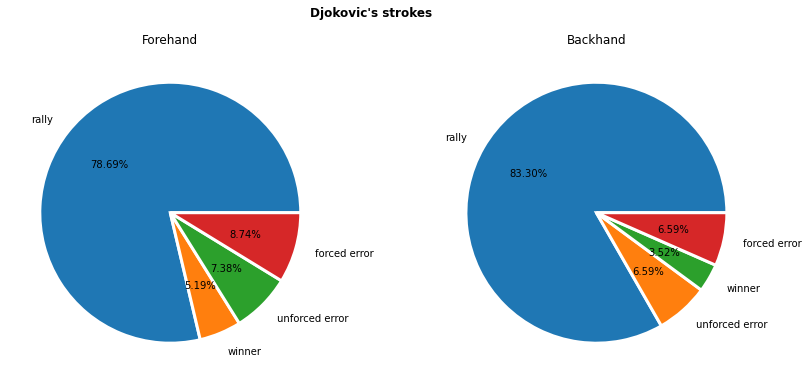

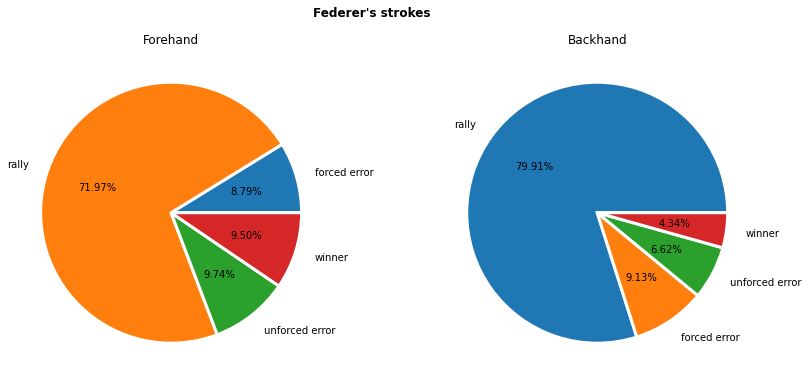

In [37]:
# Strokes in general
for i in range(2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
    ax = axes.ravel()
    plt.suptitle(player_name[i]+'\'s strokes', fontweight='bold')
    values = [list(forehand[i].values()), list(backhand[i].values())]
    labels = [list(forehand[i].keys()), list(backhand[i].keys())]
    titles = ['Forehand', 'Backhand']
    for j in range(2):  
        ax[j].pie(values[j],
                  labels=labels[j],
                  labeldistance=1.15,
                  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                  autopct = '%.2f%%')
        ax[j].set_title(titles[j])
    plt.show()

## Number of stroke types

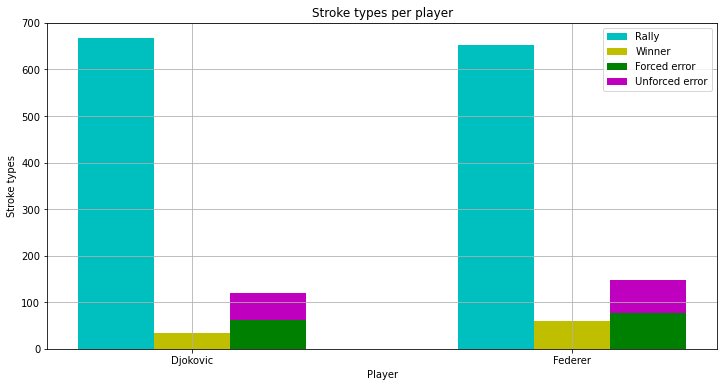

In [67]:
positions = np.array([-.5, .5])
winner = [forehand[i]['winner']+backhand[i]['winner'] for i in range(2)]
forced = [forehand[i]['forced error']+backhand[i]['forced error'] for i in range(2)]
unforced = [forehand[i]['unforced error']+backhand[i]['unforced error'] for i in range(2)]
rally = [forehand[i]['rally']+backhand[i]['rally'] for i in range(2)]

# Aces per sets
plt.figure(figsize=(12,6))
plt.bar(positions-0.2, rally, width=0.2, color='c', align='center')
plt.bar(positions, winner, width=0.2, color='y', align='center')
plt.bar(positions+0.2, forced, width=0.2, color='g', align='center')
plt.bar(positions+0.2, unforced, bottom=forced, width=0.2, color='m', align='center')
plt.ylabel('Stroke types')
plt.xticks(positions, player_name)
plt.xlabel('Player')
plt.title('Stroke types per player')
plt.legend(['Rally', 'Winner', 'Forced error','Unforced error'])
plt.grid('minor')
plt.show()

## Stroke errors

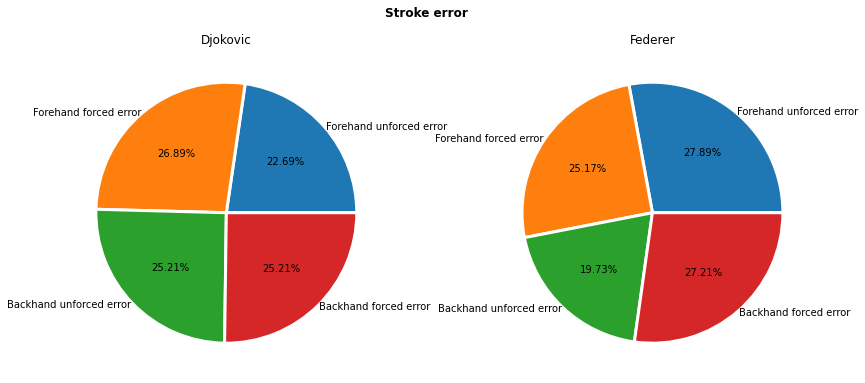

In [79]:
labels = ['Forehand unforced error','Forehand forced error',
          'Backhand unforced error','Backhand forced error']
values = [[forehand[0]['unforced error'], forehand[0]['forced error'],
          backhand[0]['unforced error'], backhand[0]['forced error']],
         [forehand[1]['unforced error'], forehand[1]['forced error'],
          backhand[1]['unforced error'], backhand[1]['forced error']]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Stroke error', fontweight='bold')
for j in range(2):  
    ax[j].pie(values[j],
              labels=labels,
              labeldistance=1.01,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[j].set_title(player_name[j])
plt.show()

# Point finish

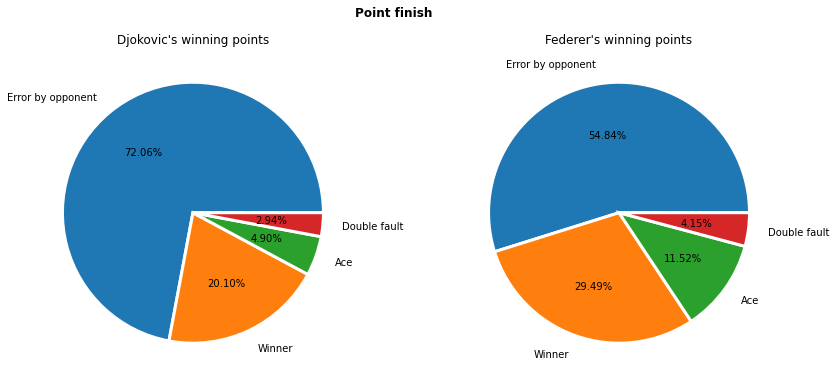

In [80]:
labels = ['Error by opponent', 'Winner', 'Ace', 'Double fault']
values = [[],[]]
# Points won by first player
values[0].append(df.loc[df['error']==2].shape[0])
values[0].append(df.loc[df['winner']==1].shape[0])
values[0].append(df.loc[df['ace']==1].shape[0])
values[0].append(df.loc[df['double_fault']==2].shape[0])
# Points won by second player
values[1].append(df.loc[df['error']==1].shape[0])
values[1].append(df.loc[df['winner']==2].shape[0])
values[1].append(df.loc[df['ace']==2].shape[0])
values[1].append(df.loc[df['double_fault']==1].shape[0])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), facecolor='white')
ax = axes.ravel()
plt.suptitle('Point finish', fontweight='bold')
for j in range(2):  
    ax[j].pie(values[j],
              labels=labels,
              labeldistance=1.15,
              wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
              autopct = '%.2f%%')
    ax[j].set_title(player_name[j]+'\'s winning points')

# Comparing point's winner and point's rally length

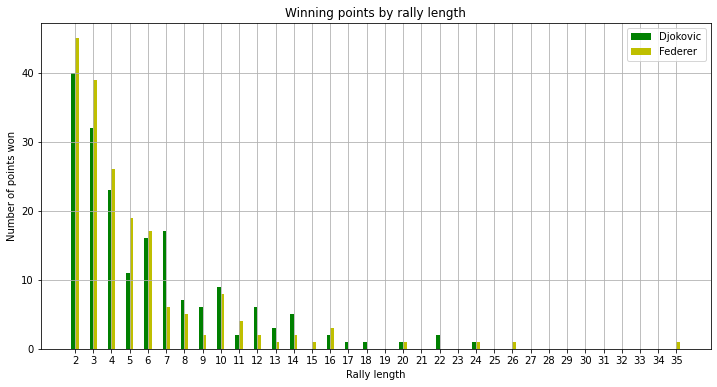

In [22]:
points_won = [[],[]]
max_rally = np.amax(df['rally_length'].to_numpy())+1
for i in range(2, max_rally):
    for j in range(2):
        points_won[j].append(df.loc[(df['rally_length']==i) & (df['pt_won_by']==(j+1))].shape[0])
    
positions = np.arange(2, max_rally)

plt.figure(figsize=(12,6))
plt.bar(positions-0.1, points_won[0], width=0.2, color='g', align='center')
plt.bar(positions+0.1, points_won[1], width=0.2, color='y', align='center')
plt.ylabel('Number of points won')
plt.xlabel('Rally length')
plt.xticks(positions, positions)
plt.title('Winning points by rally length')
plt.legend(player_name)
plt.grid('minor')
plt.show()

# Distribution of points won with respect to point duration

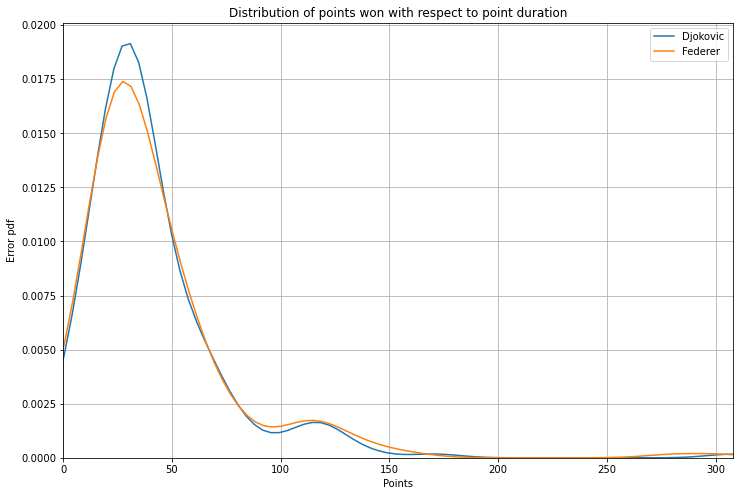

In [34]:
duration = []
for i in range(1,3):
    duration.append(df.loc[df['pt_won_by'] == i]['point_duration'])

plt.figure(figsize=(12,8))
sn.kdeplot(duration[0], label=player_name[0])
sn.kdeplot(duration[1], label=player_name[1])
plt.ylabel('Probability  of winning a point')
plt.xlabel('Point duration')
plt.xlim([0,np.amax(df['point_duration'])])
plt.title('Distribution of points won with respect to point duration')
plt.grid('minor')
plt.show()

# Points duration

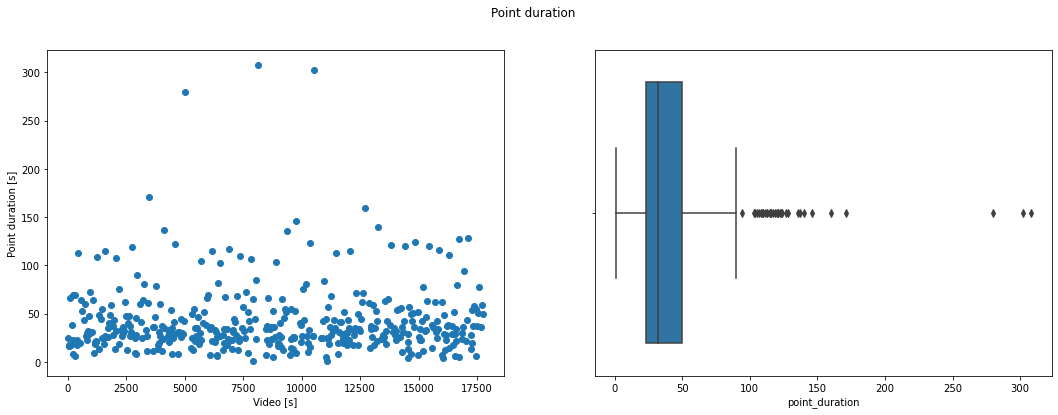

In [23]:
# Points duration
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
ax = axes.ravel()
plt.suptitle("Point duration")

# Show timestamps of
ax[0].scatter(df['vid_second'],df['point_duration'])
ax[0].set_xlabel("Video [s]")
ax[0].set_ylabel("Point duration [s]")

# Show boxchart of points duration
sn.boxplot(ax=ax[1], x=df['point_duration'])

plt.show()

## Rally length

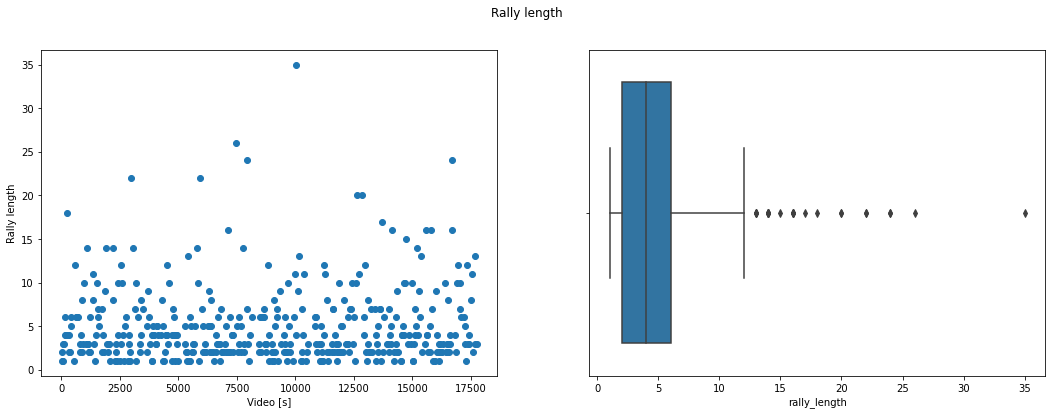

In [24]:
# Points duration
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
ax = axes.ravel()
plt.suptitle("Rally length")

# Show timestamps of
ax[0].scatter(df['vid_second'],df['rally_length'])
ax[0].set_xlabel("Video [s]")
ax[0].set_ylabel("Rally length")

# Show boxchart of points duration
sn.boxplot(ax=ax[1], x=df['rally_length'])

plt.show()

## Correlation between rally lenght, point duration and error

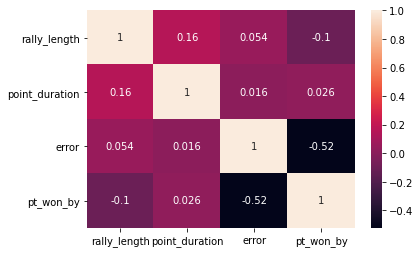

In [50]:
corrMatrix = df[['rally_length','point_duration', 'error','pt_won_by']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Errors

### Errors through match

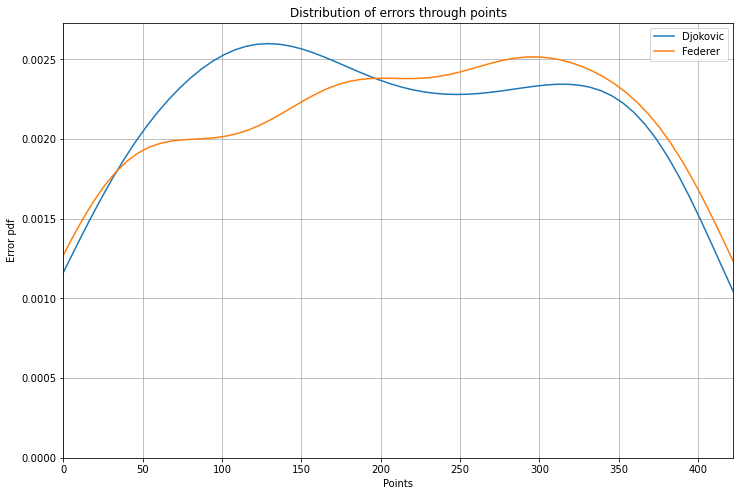

In [27]:
error1 = df.loc[df['error'] == 1].index.to_numpy()
error2 = df.loc[df['error'] == 2].index.to_numpy()

plt.figure(figsize=(12,8))
sn.kdeplot(error1, label=player_name[0])
sn.kdeplot(error2, label=player_name[1])
plt.ylabel('Error pdf')
plt.xlabel('Points')
plt.xlim([0,df.shape[0]])
plt.title('Distribution of errors through points')
plt.grid('minor')
plt.show()